<a href="https://colab.research.google.com/github/jkarthiknai/Hotel-Reviews-Classification/blob/main/EDA_Truthful_Deceptive_Hotel_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#upload op_spam_v1.4.zip & Cleaned_Hotel_Reviews_generated.csv
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
from google.colab import files
#files.upload()
os.system('unzip /content/op_spam_v1.4.zip')

256

In [3]:
import os

path='/content/op_spam_v1.4'
files = os.listdir(path)
print(files)

for item in files:
  print(item)

['README.md', 'LICENSE', 'positive_polarity', 'negative_polarity']
README.md
LICENSE
positive_polarity
negative_polarity


In [4]:
import os
import pandas as pd

# List to store the extracted data
data = []

# Walk through the directory tree
for polarity in ['positive_polarity', 'negative_polarity']:
    polarity_path = os.path.join(path, polarity)

    if polarity == 'positive_polarity':
      truthfulness_folders = ['truthful_from_TripAdvisor', 'deceptive_from_MTurk']
    elif polarity == 'negative_polarity':
      truthfulness_folders = ['truthful_from_Web', 'deceptive_from_MTurk']

    for truthfulness in truthfulness_folders:
        truthfulness_path = os.path.join(polarity_path, truthfulness)

        for fold in ['fold1', 'fold2', 'fold3', 'fold4', 'fold5']:
            fold_path = os.path.join(truthfulness_path, fold)

            for review_file in os.listdir(fold_path):
                file_path = os.path.join(fold_path, review_file)

                # Read the review text
                with open(file_path, 'r') as file:
                    review_text = file.read().strip()

                # Extract metadata from the filename
                review_type = 'deceptive' if review_file.startswith('d_') else 'truthful'
                hotel_name = review_file.split('_')[1]  # Extract hotel name
                review_number = review_file.split('_')[-1].replace('.txt', '')  # Review number

                # Append the data
                data.append({
                    'hotel_name': hotel_name,
                    'review_text': review_text,
                    'review_type': review_type,
                    'polarity': polarity.split('_')[0]  # 'positive' or 'negative'
                    #'source': truthfulness.split('_')[-1],  # 'TripAdvisor' or 'MTurk'
                    #'review_number': review_number,
                    #'file_path': file_path
                })

# Convert the list into a pandas DataFrame
df = pd.DataFrame(data)

# Preview the DataFrame
print(df.head())
df.tail()

  hotel_name                                        review_text review_type  \
0    sofitel  our stay was absolutely perfect. its a cool ho...    truthful   
1     hilton  My stay was quick but awesome. After a long da...    truthful   
2    sofitel  On a recent trip to Chicago to attend a major ...    truthful   
3     hilton  Staying at this hotel was one of the high poin...    truthful   
4    sofitel  I read the reviews on Trip Advisor for this pr...    truthful   

   polarity  
0  positive  
1  positive  
2  positive  
3  positive  
4  positive  


,hotel_name,review_text,review_type,polarity
1595,palmer,"The Palmer House Hilton, while it looks good i...",deceptive,negative
1596,intercontinental,This hotel was very poor with customer service...,deceptive,negative
1597,intercontinental,The International Chicago Magnificent Mile is ...,deceptive,negative
1598,intercontinental,Problems started when I booked the InterContin...,deceptive,negative
1599,palmer,"My husband, three year old son and I arrived a...",deceptive,negative


In [5]:
df.to_csv('Hotel_Reviews.csv', index=False)
df.info()
df1=pd.read_csv('Cleaned_Hotel_Reviews_generated.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel_name   1600 non-null   object
 1   review_text  1600 non-null   object
 2   review_type  1600 non-null   object
 3   polarity     1600 non-null   object
dtypes: object(4)
memory usage: 50.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel_name   261 non-null    object
 1   review_text  261 non-null    object
 2   review_type  261 non-null    object
 3   polarity     261 non-null    object
dtypes: object(4)
memory usage: 8.3+ KB


In [6]:
df1=df1.drop_duplicates(subset=['review_text']).reset_index(drop=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   hotel_name   169 non-null    object
 1   review_text  169 non-null    object
 2   review_type  169 non-null    object
 3   polarity     169 non-null    object
dtypes: object(4)
memory usage: 5.4+ KB


In [7]:
df.isnull().sum()
df1.isnull().sum()

,0
hotel_name,0
review_text,0
review_type,0
polarity,0


In [8]:
df[['review_type','polarity']].value_counts()

review_type  polarity
deceptive    negative    400
             positive    400
truthful     negative    400
             positive    400
Name: count, dtype: int64

In [9]:
df1[['review_type','polarity']].value_counts()

,,count
review_type,polarity,
deceptive,negative,84
truthful,positive,83
deceptive,positive,1
truthful,negative,1


In [10]:
df['word_count'] = df['review_text'].apply(len)
df1['word_count'] = df1['review_text'].apply(len)

In [11]:
df.describe()

,word_count
count,1600.000000
mean,805.056250
std,467.349336
min,149.000000
25%,485.750000
50%,698.000000
75%,986.250000
max,4158.000000


In [12]:
df1.describe()

,word_count
count,169.000000
mean,265.402367
std,84.226899
min,92.000000
25%,188.000000
50%,253.000000
75%,335.000000
max,483.000000


In [13]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
#nltk.download('punkt', download_dir='/usr/local/nltk_data')

from nltk.tokenize import sent_tokenize

def count_sentences(text):
  sentences = sent_tokenize(text)
  return len(sentences)

df['review_text'].apply(count_sentences)
df1['review_text'].apply(count_sentences)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,review_text
0,6
1,6
2,6
3,6
4,5
...,...
164,2
165,3
166,3
167,3


In [14]:
print(count_sentences(df['review_text'][0]))
df['sentence_count'] = df['review_text'].apply(count_sentences)
df1['sentence_count'] = df1['review_text'].apply(count_sentences)

6


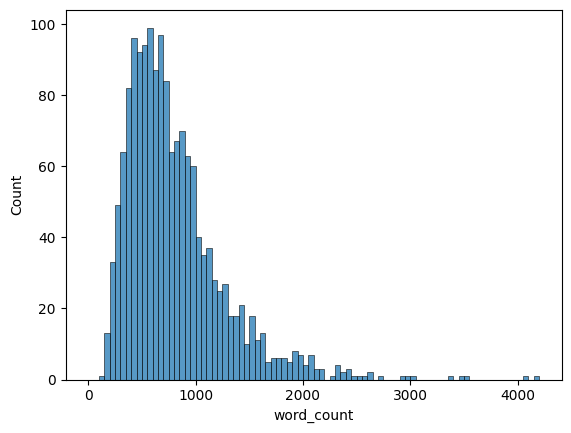

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['word_count'], bins=range(0, df['word_count'].max()+50,50))
plt.show()

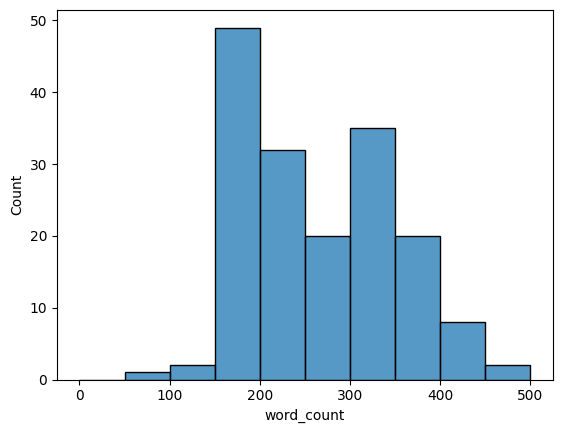

In [16]:
sns.histplot(df1['word_count'], bins=range(0, df1['word_count'].max()+50,50))
plt.show()

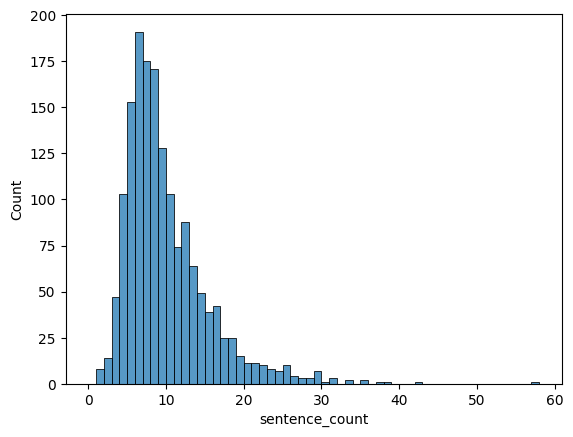

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['sentence_count'], bins=range(0,df['sentence_count'].max()+1,1))
plt.show()

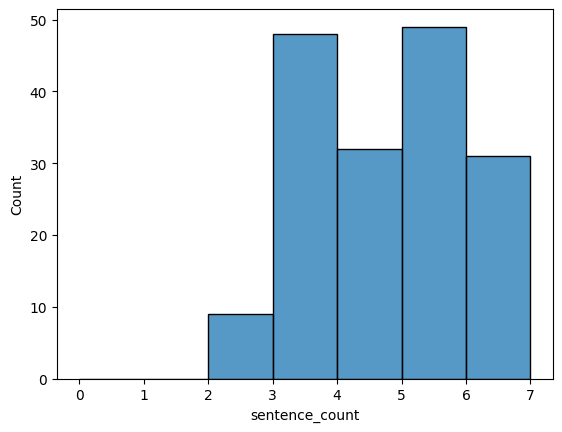

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df1['sentence_count'], bins=range(0,df1['sentence_count'].max()+1,1))
plt.show()

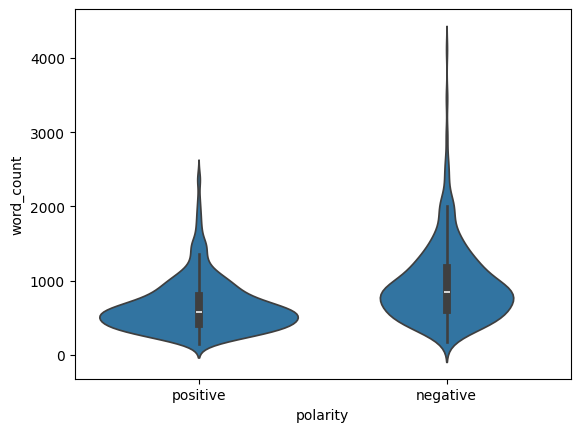

In [19]:
sns.violinplot(x=df['polarity'], y=df['word_count'], data=df)
plt.show()

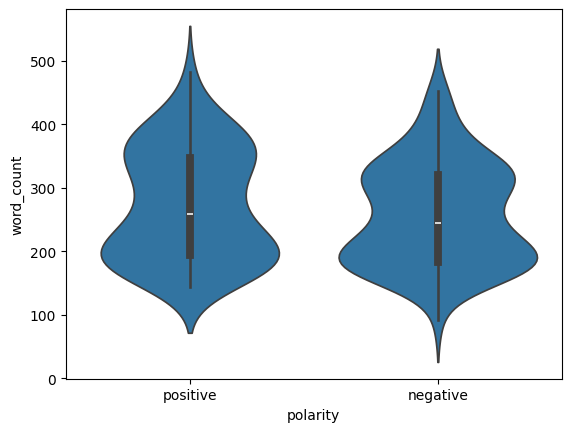

In [20]:
sns.violinplot(x=df1['polarity'], y=df1['word_count'], data=df1)
plt.show()

<Axes: xlabel='polarity', ylabel='sentence_count'>

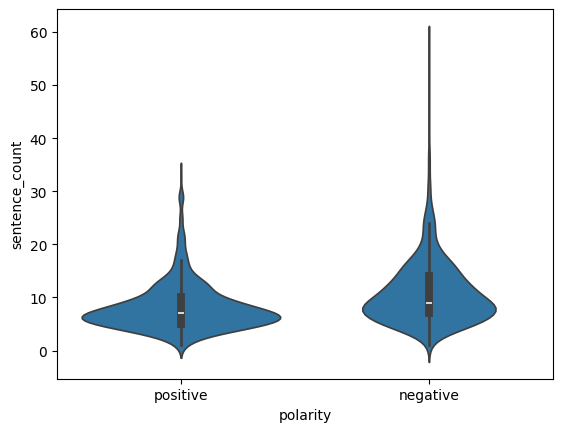

In [21]:
sns.violinplot(x=df['polarity'], y=df['sentence_count'], data=df)

<Axes: xlabel='polarity', ylabel='sentence_count'>

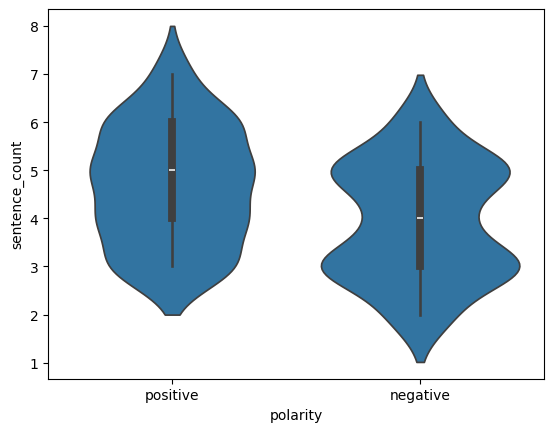

In [22]:
sns.violinplot(x=df1['polarity'], y=df1['sentence_count'], data=df1)

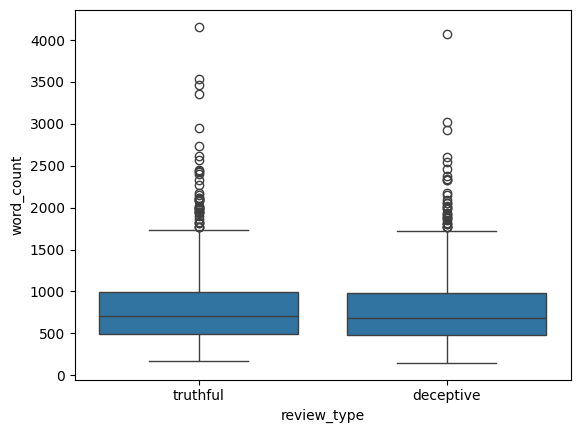

In [23]:
sns.boxplot(x=df['review_type'], y=df['word_count'], data=df)
plt.show()

<Axes: xlabel='sentence_count', ylabel='count'>

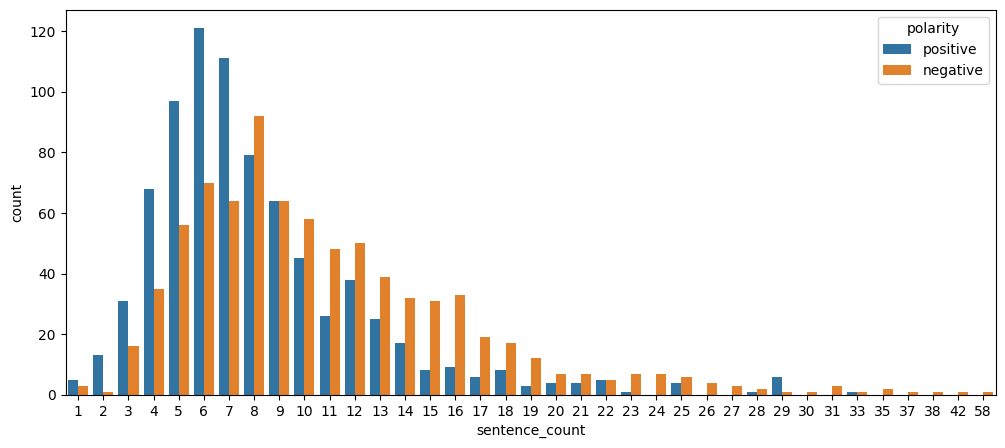

In [24]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['sentence_count'], data=df, hue='polarity')

<Axes: xlabel='sentence_count', ylabel='count'>

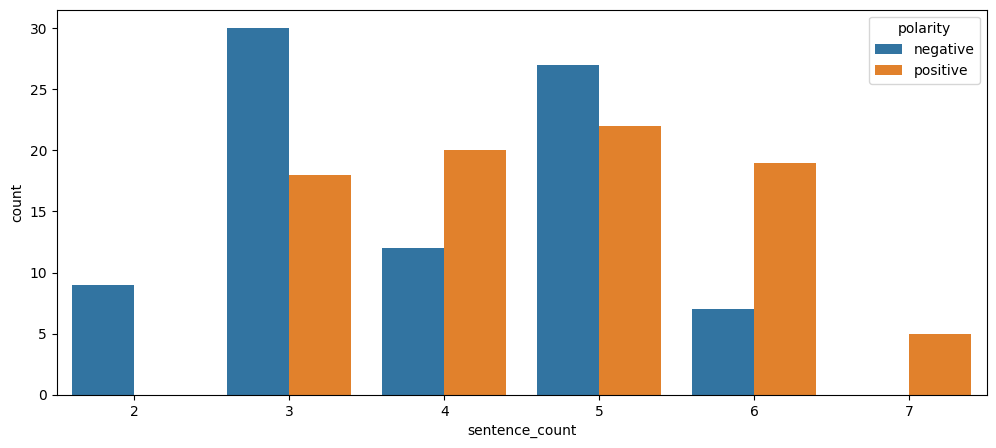

In [25]:
plt.figure(figsize=(12,5))
sns.countplot(x=df1['sentence_count'], data=df1, hue='polarity')

<Axes: xlabel='sentence_count', ylabel='count'>

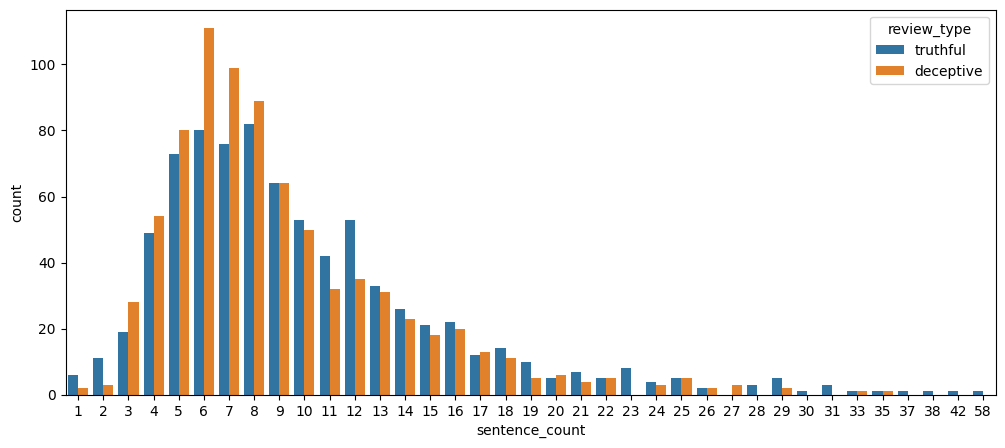

In [26]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['sentence_count'], data=df, hue='review_type')

<Axes: xlabel='sentence_count', ylabel='count'>

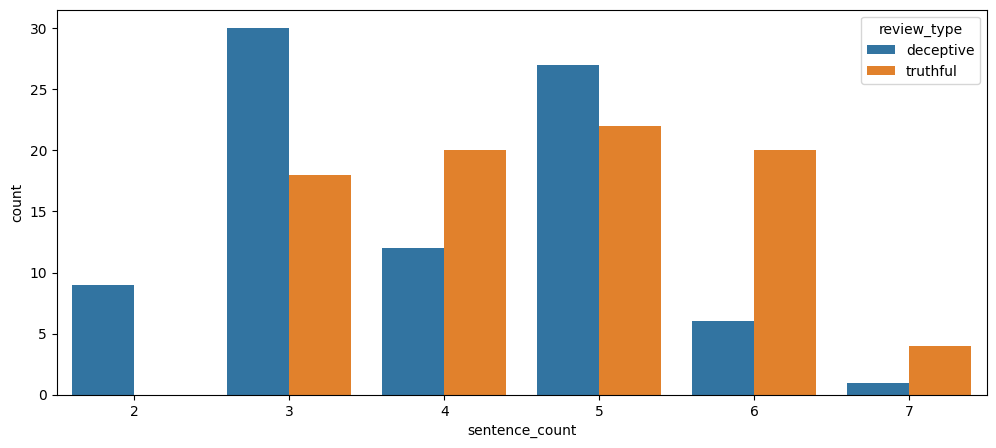

In [27]:
plt.figure(figsize=(12,5))
sns.countplot(x=df1['sentence_count'], data=df1, hue='review_type')

<Axes: xlabel='word_count', ylabel='sentence_count'>

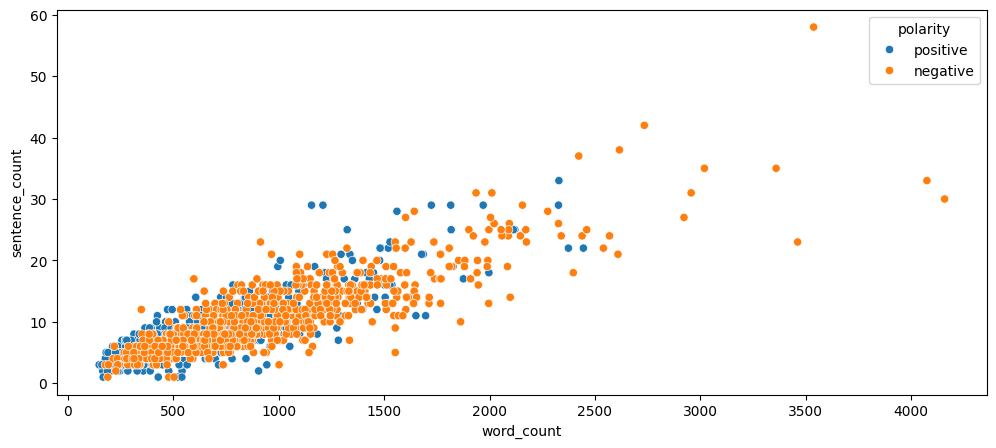

In [28]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['word_count'], y=df['sentence_count'],data=df, hue='polarity')

<Axes: xlabel='word_count', ylabel='sentence_count'>

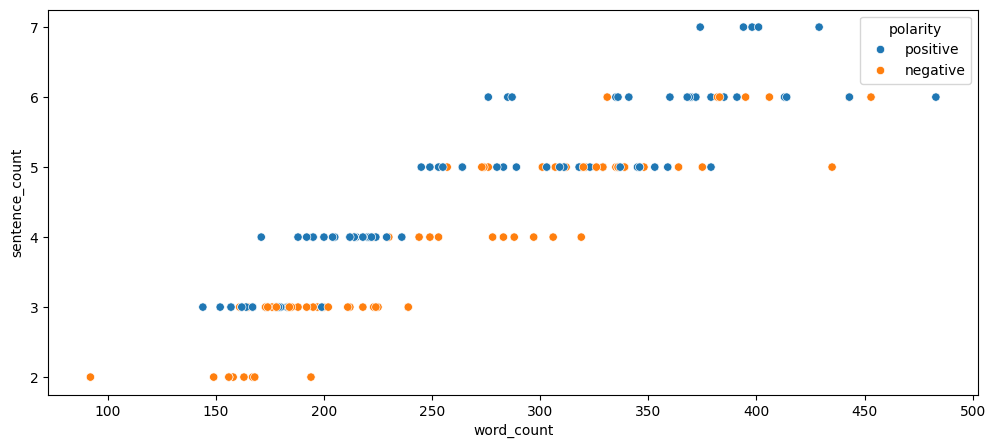

In [29]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df1['word_count'], y=df1['sentence_count'],data=df1, hue='polarity')

<Axes: xlabel='word_count', ylabel='sentence_count'>

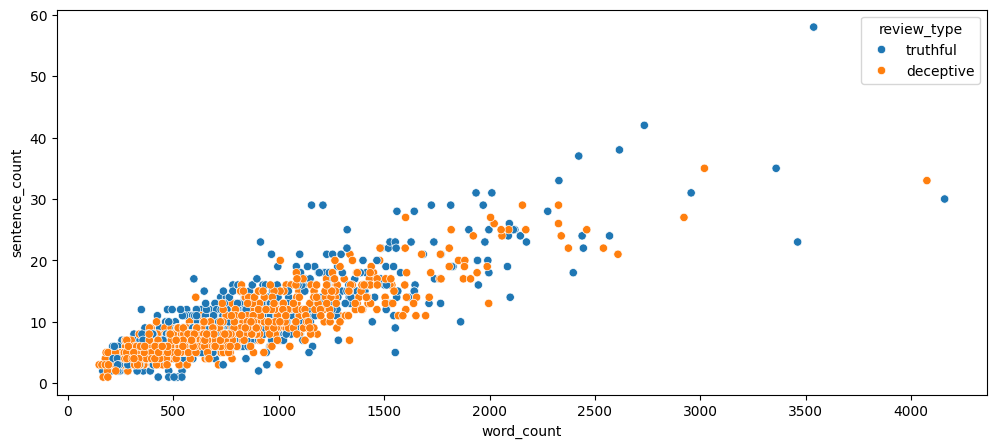

In [30]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['word_count'], y=df['sentence_count'], data=df, hue=df['review_type'])

<Axes: ylabel='Frequency'>

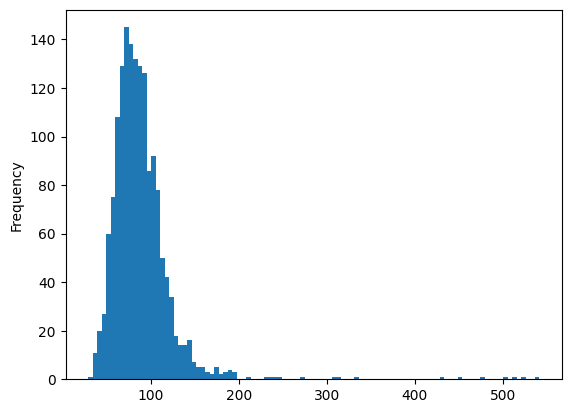

In [31]:
df['avgwordsper_sentence'] = df['word_count']/df['sentence_count']
df['avgwordsper_sentence'].plot(kind='hist',bins=100)

<Axes: ylabel='Frequency'>

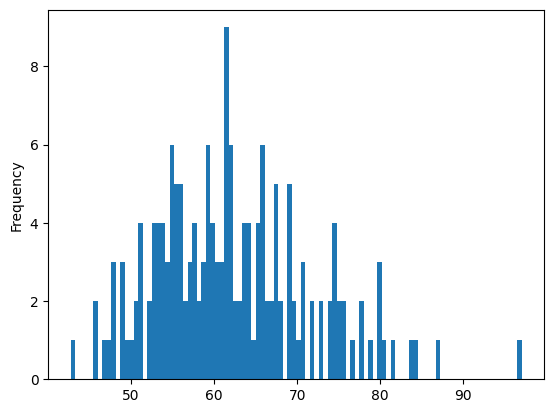

In [32]:
df1['avgwordsper_sentence'] = df1['word_count']/df1['sentence_count']
df1['avgwordsper_sentence'].plot(kind='hist',bins=100)

<Axes: xlabel='avgwordsper_sentence', ylabel='word_count'>

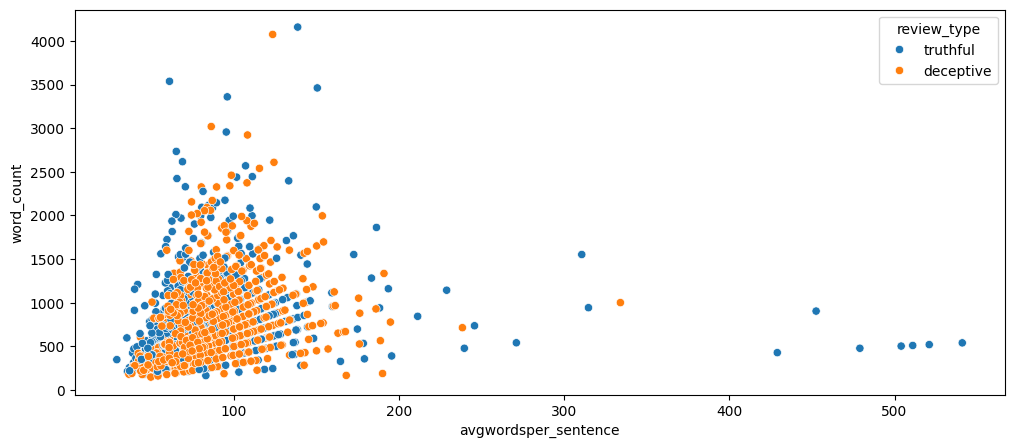

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['avgwordsper_sentence'], y=df['word_count'],data=df, hue='review_type')

<Axes: xlabel='avgwordsper_sentence', ylabel='sentence_count'>

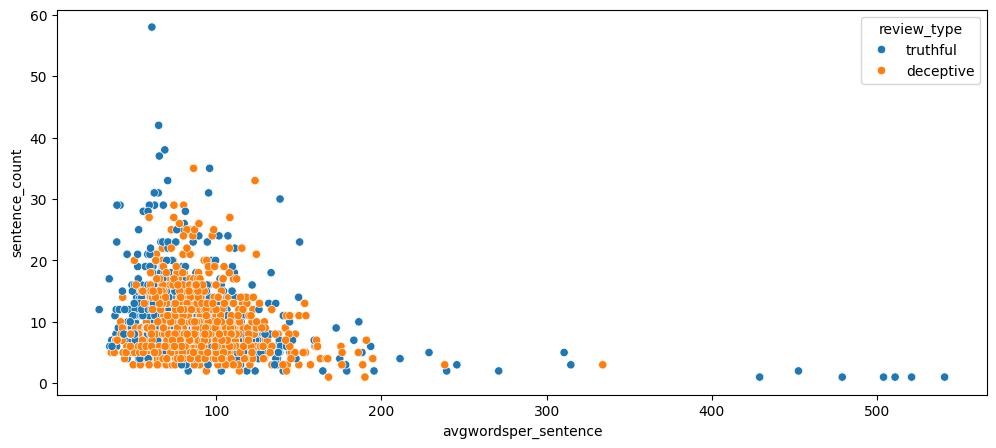

In [34]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df['avgwordsper_sentence'], y=df['sentence_count'],data=df, hue='review_type')

In [35]:
print(df[(df['word_count']>0) & (df['word_count']<=500)][['review_type','polarity']].value_counts())
print(df[(df['word_count']>500) & (df['word_count']<=1500)][['review_type','polarity']].value_counts())
print()
print(df[(df['word_count']>1500) & (df['word_count']<=2500)][['review_type','polarity']].value_counts())
print()
print(df[(df['word_count']>2500)][['review_type','polarity']].value_counts())

review_type  polarity
deceptive    positive    157
truthful     positive    148
             negative     64
deceptive    negative     63
Name: count, dtype: int64
review_type  polarity
deceptive    negative    292
truthful     negative    282
             positive    236
deceptive    positive    232
Name: count, dtype: int64

review_type  polarity
truthful     negative    46
deceptive    negative    40
truthful     positive    16
deceptive    positive    11
Name: count, dtype: int64

review_type  polarity
truthful     negative    8
deceptive    negative    5
Name: count, dtype: int64


In [36]:
duplicate_reviews = df[df.duplicated(subset='review_text')]
print(duplicate_reviews)
print(duplicate_reviews.shape[0])

     hotel_name                                        review_text  \
868      monaco  Very disappointed in our stay in Chicago Monoc...   
914     affinia  I'd been searching for a cool, non-chain hotel...   
989        omni  My daughter and I woke in the morning wanting ...   
1015       omni  The Omni was chosen for it's location whichwor...   

     review_type  polarity  word_count  sentence_count  avgwordsper_sentence  
868     truthful  negative         707               8             88.375000  
914     truthful  negative        1643              15            109.533333  
989     truthful  negative         481               6             80.166667  
1015    truthful  negative         931               8            116.375000  
4


In [37]:
df['word_count'].value_counts()

,count
word_count,
436,8
738,6
699,6
679,5
544,5
...,...
188,1
1311,1
709,1


In [38]:
!pip install wordcloud

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_name            1600 non-null   object 
 1   review_text           1600 non-null   object 
 2   review_type           1600 non-null   object 
 3   polarity              1600 non-null   object 
 4   word_count            1600 non-null   int64  
 5   sentence_count        1600 non-null   int64  
 6   avgwordsper_sentence  1600 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 87.6+ KB


In [40]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
# Download the stopwords dataset if needed
nltk.download('stopwords')  # Download stopwords data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Optional: Preprocess text (tokenize, remove stopwords and punctuation)
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]  # Remove stopwords/punctuation
    return ' '.join(tokens)  # Return cleaned text as string

# Apply preprocessing to the 'review_text' column
df['cleaned_text'] = df['review_text'].apply(preprocess_text)

# Split the dataset into truthful and deceptive reviews
truthful_reviews = df[df['review_type'] == 'truthful']['cleaned_text']
deceptive_reviews = df[df['review_type'] == 'deceptive']['cleaned_text']

# Combine the truthful and deceptive reviews into a list for TF-IDF computation
all_reviews = pd.concat([truthful_reviews, deceptive_reviews])

# Create labels for TF-IDF (0 for truthful, 1 for deceptive)
labels = [0]*len(truthful_reviews) + [1]*len(deceptive_reviews)

# Initialize TF-IDF Vectorizer with n-grams (unigrams, bigrams, trigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.95, min_df=2)  # You can tweak min_df/max_df

# Fit and transform the reviews to generate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(all_reviews)

# Get feature names (the n-grams)
ngrams = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=ngrams)

# Add the labels to distinguish between truthful and deceptive
tfidf_df['label'] = labels

# Show top N TF-IDF values for truthful and deceptive reviews separately
def top_tfidf_ngrams(tfidf_df, label, n=10):
    # Filter by label (0 for truthful, 1 for deceptive)
    label_df = tfidf_df[tfidf_df['label'] == label].drop(columns='label')
    # Compute mean TF-IDF score for each n-gram across all reviews of this label
    mean_tfidf = label_df.mean().sort_values(ascending=False)
    return mean_tfidf.head(n)

# Display top 10 n-grams for truthful reviews
print("Top 10 n-grams for Truthful Reviews:")
print(top_tfidf_ngrams(tfidf_df, label=0, n=10))

# Display top 10 n-grams for deceptive reviews
print("\nTop 10 n-grams for Deceptive Reviews:")
print(top_tfidf_ngrams(tfidf_df, label=1, n=10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 n-grams for Truthful Reviews:
room        0.039959
hotel       0.039698
great       0.028101
stay        0.022177
location    0.020146
staff       0.019852
would       0.019031
us          0.017899
service     0.017096
stayed      0.016919
dtype: float64

Top 10 n-grams for Deceptive Reviews:
hotel      0.049872
room       0.039278
chicago    0.036624
stay       0.026675
would      0.020657
service    0.020529
staff      0.018718
rooms      0.017594
like       0.016961
great      0.016641
dtype: float64


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('punkt')
# Download the stopwords dataset if needed
nltk.download('stopwords')  # Download stopwords data
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Optional: Preprocess text (tokenize, remove stopwords and punctuation)
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def preprocess_text(text):
    text = text.lower()  # Lowercase
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words and word not in punctuation]  # Remove stopwords/punctuation
    return ' '.join(tokens)  # Return cleaned text as string

# Apply preprocessing to the 'review_text' column
df1['cleaned_text'] = df1['review_text'].apply(preprocess_text)

# Split the dataset into truthful and deceptive reviews
truthful_reviews = df1[df1['review_type'] == 'truthful']['cleaned_text']
deceptive_reviews = df1[df1['review_type'] == 'deceptive']['cleaned_text']

# Combine the truthful and deceptive reviews into a list for TF-IDF computation
all_reviews = pd.concat([truthful_reviews, deceptive_reviews])

# Create labels for TF-IDF (0 for truthful, 1 for deceptive)
labels = [0]*len(truthful_reviews) + [1]*len(deceptive_reviews)

# Initialize TF-IDF Vectorizer with n-grams (unigrams, bigrams, trigrams)
vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_df=0.95, min_df=2)  # You can tweak min_df/max_df

# Fit and transform the reviews to generate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(all_reviews)

# Get feature names (the n-grams)
ngrams = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=ngrams)

# Add the labels to distinguish between truthful and deceptive
tfidf_df['label'] = labels

# Show top N TF-IDF values for truthful and deceptive reviews separately
def top_tfidf_ngrams(tfidf_df, label, n=10):
    # Filter by label (0 for truthful, 1 for deceptive)
    label_df = tfidf_df[tfidf_df['label'] == label].drop(columns='label')
    # Compute mean TF-IDF score for each n-gram across all reviews of this label
    mean_tfidf = label_df.mean().sort_values(ascending=False)
    return mean_tfidf.head(n)

# Display top 10 n-grams for truthful reviews
print("Top 10 n-grams for Truthful Reviews:")
print(top_tfidf_ngrams(tfidf_df, label=0, n=10))

# Display top 10 n-grams for deceptive reviews
print("\nTop 10 n-grams for Deceptive Reviews:")
print(top_tfidf_ngrams(tfidf_df, label=1, n=10))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 n-grams for Truthful Reviews:
hotel          0.050855
location       0.050818
staff          0.046840
comfortable    0.043960
loved          0.042381
exploring      0.041510
stay           0.040587
friendly       0.040423
amenities      0.037171
perfect        0.036892
dtype: float64

Top 10 n-grams for Deceptive Reviews:
service       0.056574
expected      0.053199
nice          0.037930
check         0.037902
found         0.037425
price         0.037321
in            0.037226
check in      0.037226
experience    0.036159
stay          0.035925
dtype: float64


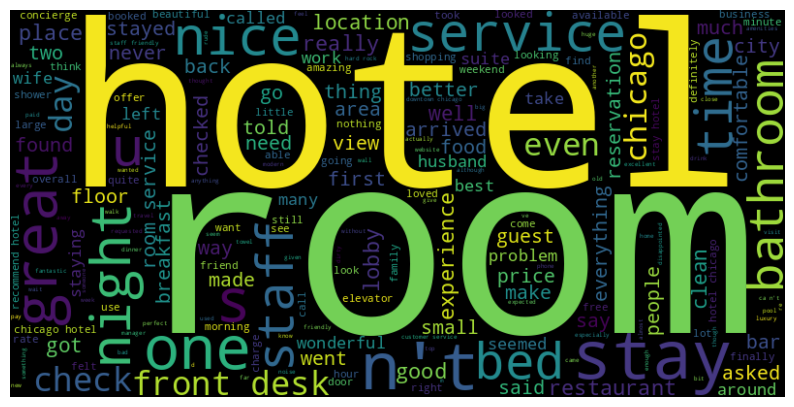

In [42]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Join all the cleaned text from the reviews into one large text
all_reviews_inone = " ".join(df['cleaned_text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_reviews_inone)

# Create a Seaborn plot with the word cloud
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Use imshow to display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')

# Remove the axis
plt.axis("off")

# Show the plot
plt.show()

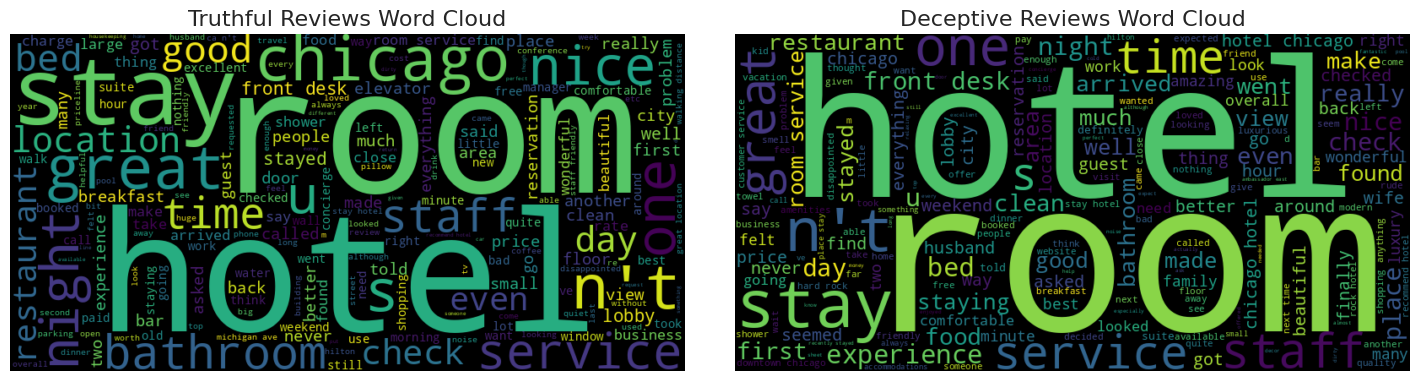

In [43]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

# Separate the reviews based on 'review_type'
truthful_reviews = " ".join(df[df['review_type'] == 'truthful']['cleaned_text'])
deceptive_reviews = " ".join(df[df['review_type'] == 'deceptive']['cleaned_text'])

# Generate word clouds for truthful and deceptive reviews
wordcloud_truthful = WordCloud(width=800, height=400, background_color='black').generate(truthful_reviews)
wordcloud_deceptive = WordCloud(width=800, height=400, background_color='black').generate(deceptive_reviews)

# Plotting the word clouds side by side using Seaborn
plt.figure(figsize=(15, 8))

# Subplot for Truthful Reviews
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_truthful, interpolation='bilinear')
plt.title('Truthful Reviews Word Cloud', fontsize=16)
plt.axis("off")

# Subplot for Deceptive Reviews
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_deceptive, interpolation='bilinear')
plt.title('Deceptive Reviews Word Cloud', fontsize=16)
plt.axis("off")

# Show the plot
plt.tight_layout(pad=3.0)
plt.show()



*   Chicago > Chicago
*   bathroom > bathroom
*   night > night
*   bed > bed
*   
*   stay < stay
*   room < room
*   staff < staff

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   hotel_name            1600 non-null   object 
 1   review_text           1600 non-null   object 
 2   review_type           1600 non-null   object 
 3   polarity              1600 non-null   object 
 4   word_count            1600 non-null   int64  
 5   sentence_count        1600 non-null   int64  
 6   avgwordsper_sentence  1600 non-null   float64
 7   cleaned_text          1600 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 100.1+ KB


word_count
[500, 1000)     785
[0, 500)        430
[1000, 1500)    259
[1500, 2000)     85
[2000, 2500)     28
[2500, 3000)      7
[3000, 3500)      3
[4000, 4500)      2
[3500, 4000)      1
Name: count, dtype: int64

805.05625


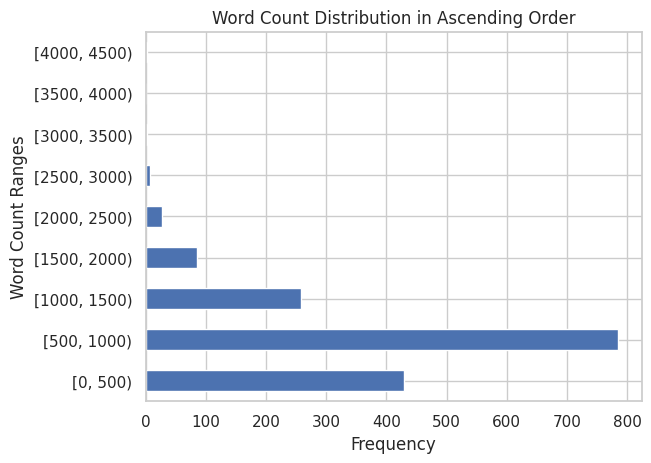

In [45]:
import numpy as np
bins=range(0, df['word_count'].max()+500,500)
print(pd.cut(df['word_count'], bins=bins, right=False).value_counts())
print()
print(np.average(df['word_count']))

# Cut the word count into specified bins and sort the value counts
word_count_bins = pd.cut(df['word_count'], bins=bins, right=False)

# Sort the value counts by index (which represents the bins) and plot
word_count_bins.value_counts().sort_index(ascending=True).plot(kind='barh')

# Show the plot
plt.xlabel('Frequency')
plt.ylabel('Word Count Ranges')
plt.title('Word Count Distribution in Ascending Order')
plt.show()


word_count
[0, 500)    169
Name: count, dtype: int64

265.40236686390534


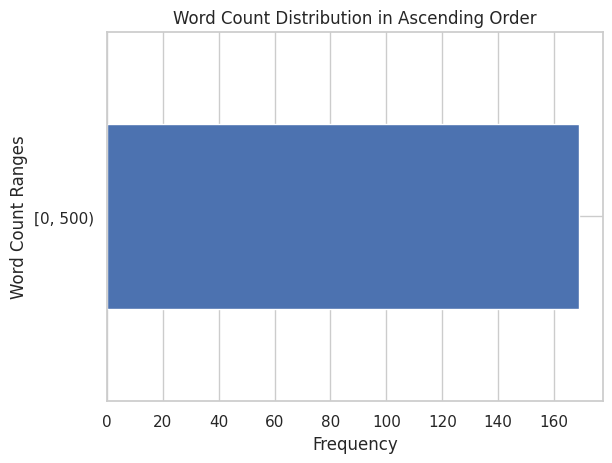

In [46]:
import numpy as np
bins=range(0, df1['word_count'].max()+500,500)
print(pd.cut(df1['word_count'], bins=bins, right=False).value_counts())
print()
print(np.average(df1['word_count']))

# Cut the word count into specified bins and sort the value counts
word_count_bins = pd.cut(df1['word_count'], bins=bins, right=False)

# Sort the value counts by index (which represents the bins) and plot
word_count_bins.value_counts().sort_index(ascending=True).plot(kind='barh')

# Show the plot
plt.xlabel('Frequency')
plt.ylabel('Word Count Ranges')
plt.title('Word Count Distribution in Ascending Order')
plt.show()


**1->TEXT PROCESSING**

In [47]:
df.tail()

,hotel_name,review_text,review_type,polarity,word_count,sentence_count,avgwordsper_sentence,cleaned_text
1595,palmer,"The Palmer House Hilton, while it looks good i...",deceptive,negative,448,6,74.666667,palmer house hilton looks good pictures outsid...
1596,intercontinental,This hotel was very poor with customer service...,deceptive,negative,314,4,78.500000,hotel poor customer service worried keeping ev...
1597,intercontinental,The International Chicago Magnificent Mile is ...,deceptive,negative,546,6,91.000000,international chicago magnificent mile shroude...
1598,intercontinental,Problems started when I booked the InterContin...,deceptive,negative,745,8,93.125000,problems started booked intercontinental chica...
1599,palmer,"My husband, three year old son and I arrived a...",deceptive,negative,1267,20,63.350000,husband three year old son arrived palmer hous...


**2-> Sentiment Analysis**

In [48]:
import string
from textblob import TextBlob

# Function to calculate sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
df[['sentiment_polarity', 'sentiment_subjectivity']] = df['cleaned_text'].apply(get_sentiment).apply(pd.Series)

# Function to extract emotional tone (simple rule-based approach)

def extract_emotion(polarity):
    if polarity > 0.5:
        return 'Joy'
    elif polarity > 0:
        return 'Trust'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.5:
        return 'Fear'
    else:
        return 'Anger'
'''
def extract_emotion(polarity):
    if polarity > 0.75:
        return 'Ecstasy'
    elif polarity > 0.5:
        return 'Joy'
    elif polarity > 0.25:
        return 'Serenity'
    elif polarity > 0:
        return 'Interest'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.25:
        return 'Annoyance'
    elif polarity > -0.5:
        return 'Anger'
    elif polarity > -0.75:
        return 'Rage'
    else:
        return 'Terror'
'''
# Apply emotion extraction based on polarity
df['emotion'] = df['sentiment_polarity'].apply(extract_emotion)

# Show the resulting DataFrame with sentiment and emotion
print(df.head())

# Optional: Aggregate results by review type (truthful vs. deceptive)
sentiment_summary = df.groupby('review_type').agg({
    'sentiment_polarity': ['mean', 'std'],
    'sentiment_subjectivity': ['mean', 'std'],
    'emotion': lambda x: x.value_counts().idxmax()  # Most common emotion
})

print("\nSentiment Summary by Review Type:")
print(sentiment_summary)


  hotel_name                                        review_text review_type  \
0    sofitel  our stay was absolutely perfect. its a cool ho...    truthful   
1     hilton  My stay was quick but awesome. After a long da...    truthful   
2    sofitel  On a recent trip to Chicago to attend a major ...    truthful   
3     hilton  Staying at this hotel was one of the high poin...    truthful   
4    sofitel  I read the reviews on Trip Advisor for this pr...    truthful   

   polarity  word_count  sentence_count  avgwordsper_sentence  \
0  positive         317               6             52.833333   
1  positive         819              13             63.000000   
2  positive         436               4            109.000000   
3  positive         697               9             77.444444   
4  positive         749              12             62.416667   

                                        cleaned_text  sentiment_polarity  \
0  stay absolutely perfect cool hotel look design...      

In [49]:
import string
from textblob import TextBlob

# Function to calculate sentiment polarity and subjectivity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply sentiment analysis
df1[['sentiment_polarity', 'sentiment_subjectivity']] = df1['cleaned_text'].apply(get_sentiment).apply(pd.Series)

# Function to extract emotional tone (simple rule-based approach)

def extract_emotion(polarity):
    if polarity > 0.5:
        return 'Joy'
    elif polarity > 0:
        return 'Trust'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.5:
        return 'Fear'
    else:
        return 'Anger'
'''
def extract_emotion(polarity):
    if polarity > 0.75:
        return 'Ecstasy'
    elif polarity > 0.5:
        return 'Joy'
    elif polarity > 0.25:
        return 'Serenity'
    elif polarity > 0:
        return 'Interest'
    elif polarity == 0:
        return 'Neutral'
    elif polarity > -0.25:
        return 'Annoyance'
    elif polarity > -0.5:
        return 'Anger'
    elif polarity > -0.75:
        return 'Rage'
    else:
        return 'Terror'
'''
# Apply emotion extraction based on polarity
df1['emotion'] = df1['sentiment_polarity'].apply(extract_emotion)

# Show the resulting DataFrame with sentiment and emotion
print(df.head())

# Optional: Aggregate results by review type (truthful vs. deceptive)
sentiment_summary = df.groupby('review_type').agg({
    'sentiment_polarity': ['mean', 'std'],
    'sentiment_subjectivity': ['mean', 'std'],
    'emotion': lambda x: x.value_counts().idxmax()  # Most common emotion
})

print("\nSentiment Summary by Review Type:")
print(sentiment_summary)


  hotel_name                                        review_text review_type  \
0    sofitel  our stay was absolutely perfect. its a cool ho...    truthful   
1     hilton  My stay was quick but awesome. After a long da...    truthful   
2    sofitel  On a recent trip to Chicago to attend a major ...    truthful   
3     hilton  Staying at this hotel was one of the high poin...    truthful   
4    sofitel  I read the reviews on Trip Advisor for this pr...    truthful   

   polarity  word_count  sentence_count  avgwordsper_sentence  \
0  positive         317               6             52.833333   
1  positive         819              13             63.000000   
2  positive         436               4            109.000000   
3  positive         697               9             77.444444   
4  positive         749              12             62.416667   

                                        cleaned_text  sentiment_polarity  \
0  stay absolutely perfect cool hotel look design...      

In [50]:
df.head()

,hotel_name,review_text,review_type,polarity,word_count,sentence_count,avgwordsper_sentence,cleaned_text,sentiment_polarity,sentiment_subjectivity,emotion
0,sofitel,our stay was absolutely perfect. its a cool ho...,truthful,positive,317,6,52.833333,stay absolutely perfect cool hotel look design...,0.442593,0.818519,Trust
1,hilton,My stay was quick but awesome. After a long da...,truthful,positive,819,13,63.000000,stay quick awesome long day seeing substantial...,0.409975,0.559028,Trust
2,sofitel,On a recent trip to Chicago to attend a major ...,truthful,positive,436,4,109.000000,recent trip chicago attend major trade show pl...,0.386646,0.555532,Trust
3,hilton,Staying at this hotel was one of the high poin...,truthful,positive,697,9,77.444444,staying hotel one high points last minute budg...,0.236667,0.491574,Trust
4,sofitel,I read the reviews on Trip Advisor for this pr...,truthful,positive,749,12,62.416667,read reviews trip advisor property ranked 1 ch...,0.376961,0.599510,Trust


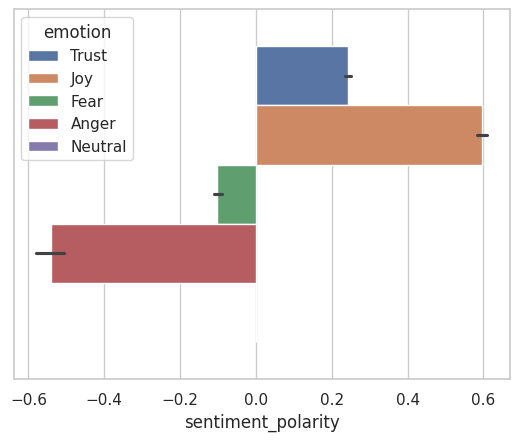

In [51]:
plt.figsize=(12,5)
sns.barplot(hue=df['emotion'],x=df['sentiment_polarity'],data=df)
plt.show()

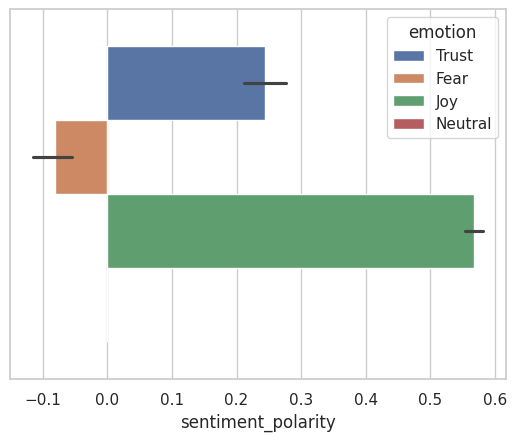

In [52]:
plt.figsize=(12,5)
sns.barplot(hue=df1['emotion'],x=df1['sentiment_polarity'],data=df1)
plt.show()

In [53]:
df[['review_type','emotion']][df['emotion']=='Anger'].value_counts()

,,count
review_type,emotion,
deceptive,Anger,4
truthful,Anger,2


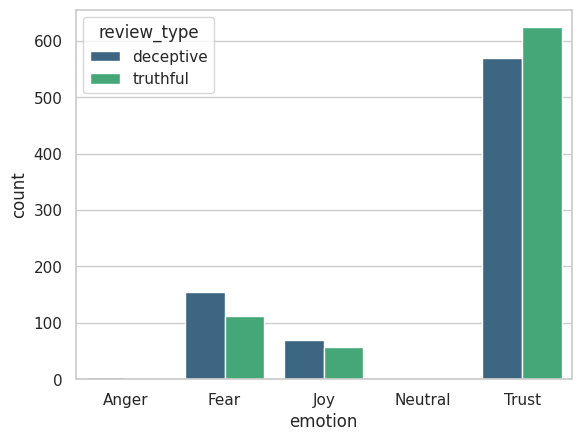

In [54]:
emotion_counts = df.groupby(['review_type', 'emotion']).size().reset_index(name='count')
sns.barplot(data=emotion_counts, x='emotion', y='count', hue='review_type', palette='viridis')
plt.show()

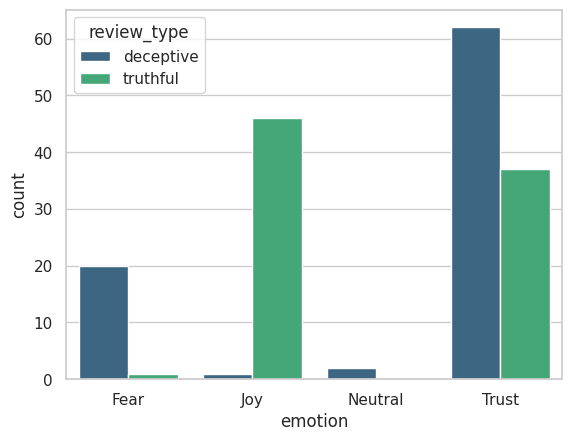

In [55]:
emotion_counts = df1.groupby(['review_type', 'emotion']).size().reset_index(name='count')
sns.barplot(data=emotion_counts, x='emotion', y='count', hue='review_type', palette='viridis')
plt.show()

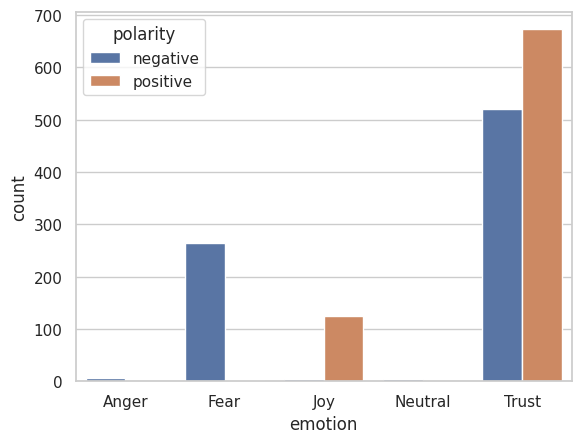

In [56]:
polarity_counts = df.groupby(['polarity','emotion']).size().reset_index(name='count')
sns.barplot(x='emotion', y='count', hue='polarity', data=polarity_counts)
plt.show()

In [57]:
df[['review_type','polarity','emotion']]

,review_type,polarity,emotion
0,truthful,positive,Trust
1,truthful,positive,Trust
2,truthful,positive,Trust
3,truthful,positive,Trust
4,truthful,positive,Trust
...,...,...,...
1595,deceptive,negative,Trust
1596,deceptive,negative,Trust
1597,deceptive,negative,Trust
1598,deceptive,negative,Trust


<Axes: xlabel='emotion', ylabel='count'>

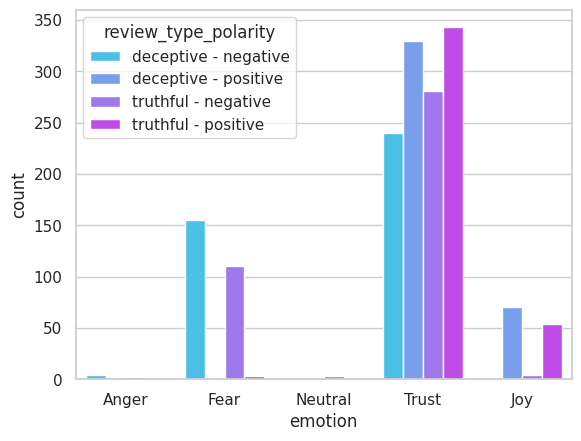

In [58]:
emotion_counts = df.groupby(['review_type', 'polarity', 'emotion']).size().reset_index(name='count')
emotion_counts['review_type_polarity'] = emotion_counts['review_type'] + ' - ' + emotion_counts['polarity'].astype(str)
sns.barplot(data=emotion_counts, x='emotion', y='count', hue='review_type_polarity', palette='cool')

<Axes: xlabel='emotion', ylabel='count'>

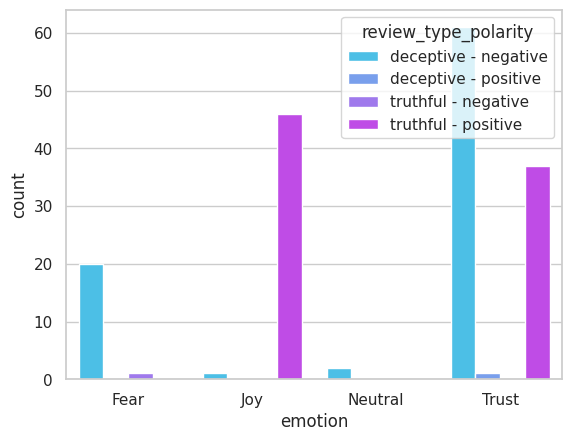

In [59]:
emotion_counts = df1.groupby(['review_type', 'polarity', 'emotion']).size().reset_index(name='count')
emotion_counts['review_type_polarity'] = emotion_counts['review_type'] + ' - ' + emotion_counts['polarity'].astype(str)
sns.barplot(data=emotion_counts, x='emotion', y='count', hue='review_type_polarity', palette='cool')

**3 -> POS tagging**

In [60]:
#!pip install spacy
#!python -m spacy download en_core_web_sm

In [61]:
import spacy
from collections import Counter

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to perform POS tagging, NER, and extract pronouns and verbs
def extract_linguistic_features(text):
    doc = nlp(text)

    # POS tagging: count each POS category
    pos_tags = [token.pos_ for token in doc]
    pos_counts = Counter(pos_tags)

    # NER: extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Extract personal pronouns and action-oriented verbs (VERB)
    pronouns = [token.text for token in doc if token.pos_ == 'PRON']
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']

    return pos_counts, entities, pronouns, action_verbs

# Apply linguistic feature extraction on the 'cleaned_text' column
df['pos_counts'], df['entities'], df['pronouns'], df['action_verbs'] = zip(*df['cleaned_text'].apply(extract_linguistic_features))

# Show a sample of the results
print(df[['cleaned_text', 'pos_counts', 'entities', 'pronouns', 'action_verbs']].head())


                                        cleaned_text  \
0  stay absolutely perfect cool hotel look design...   
1  stay quick awesome long day seeing substantial...   
2  recent trip chicago attend major trade show pl...   
3  staying hotel one high points last minute budg...   
4  read reviews trip advisor property ranked 1 ch...   

                                          pos_counts  \
0  {'VERB': 4, 'ADV': 3, 'ADJ': 8, 'NOUN': 16, 'P...   
1  {'VERB': 11, 'ADJ': 12, 'NOUN': 36, 'PUNCT': 2...   
2  {'ADJ': 8, 'NOUN': 15, 'PROPN': 5, 'VERB': 10,...   
3  {'VERB': 9, 'NOUN': 32, 'NUM': 5, 'ADJ': 18, '...   
4  {'VERB': 13, 'NOUN': 34, 'NUM': 1, 'PROPN': 5,...   

                                            entities pronouns  \
0                                                 []       []   
1  [(3 minutes morning, TIME), (1927, DATE), (2, ...       []   
2   [(chicago, GPE), (chicago, GPE), (chicago, GPE)]       []   
3  [(one, CARDINAL), (last minute, TIME), (70, DA...     [us]   
4

In [62]:
import spacy
from collections import Counter

# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')

# Function to perform POS tagging, NER, and extract pronouns and verbs
def extract_linguistic_features(text):
    doc = nlp(text)

    # POS tagging: count each POS category
    pos_tags = [token.pos_ for token in doc]
    pos_counts = Counter(pos_tags)

    # NER: extract named entities
    entities = [(ent.text, ent.label_) for ent in doc.ents]

    # Extract personal pronouns and action-oriented verbs (VERB)
    pronouns = [token.text for token in doc if token.pos_ == 'PRON']
    action_verbs = [token.text for token in doc if token.pos_ == 'VERB']

    return pos_counts, entities, pronouns, action_verbs

# Apply linguistic feature extraction on the 'cleaned_text' column
df1['pos_counts'], df1['entities'], df1['pronouns'], df1['action_verbs'] = zip(*df1['cleaned_text'].apply(extract_linguistic_features))

# Show a sample of the results
print(df1[['cleaned_text', 'pos_counts', 'entities', 'pronouns', 'action_verbs']].head())


                                        cleaned_text  \
0  recently stayed james wonderful experience sta...   
1  experience james nothing short disappointing u...   
2  high hopes stay hilton fell short room cramped...   
3  stay sofitel absolutely delightful ambiance ho...   
4  despite appealing appearance sofitel experienc...   

                                          pos_counts           entities  \
0  {'ADV': 2, 'VERB': 8, 'PROPN': 1, 'ADJ': 12, '...                 []   
1  {'NOUN': 16, 'PROPN': 1, 'PRON': 2, 'ADJ': 10,...  [(james, PERSON)]   
2  {'ADJ': 4, 'NOUN': 18, 'VERB': 10, 'PROPN': 1,...    [(night, TIME)]   
3  {'VERB': 8, 'NOUN': 14, 'ADV': 5, 'ADJ': 11, '...                 []   
4  {'SCONJ': 1, 'VERB': 9, 'NOUN': 15, 'ADJ': 8, ...                 []   

            pronouns                                       action_verbs  
0                 []  [stayed, welcoming, went, ensure, choose, expl...  
1  [nothing, anyone]  [greeted, check, delivered, paid, expected

     POS  Truthful  Deceptive
0   VERB     12346      12542
1    ADV      4376       4657
2    ADJ      9896       8898
3   NOUN     25448      22753
4  PUNCT      1781       1103


<Axes: title={'center': 'Parts of Speech (truthful vs deceptive)'}, xlabel='POS'>

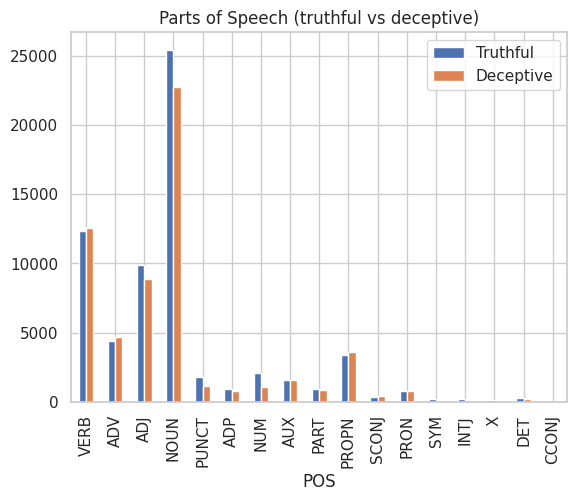

In [63]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine POS counts by review type
def aggregate_pos_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate POS counts
    pos_counts = sum((Counter(pos) for pos in filtered_df['pos_counts']), Counter())
    return pos_counts

# Get POS counts for truthful and deceptive reviews
truthful_pos_counts = aggregate_pos_counts(df, 'truthful')
deceptive_pos_counts = aggregate_pos_counts(df, 'deceptive')

# Convert to DataFrame for visualization
pos_df = pd.DataFrame({
    'POS': list(truthful_pos_counts.keys()),
    'Truthful': list(truthful_pos_counts.values()),
    'Deceptive': [deceptive_pos_counts.get(pos, 0) for pos in truthful_pos_counts.keys()]
})

print(pos_df.head())

pos_df.plot(kind='bar',x='POS', title='Parts of Speech (truthful vs deceptive)')

     POS  Truthful  Deceptive
0    ADV       150        118
1   VERB       364        452
2  PROPN        81         66
3    ADJ       506        399
4   NOUN       817        774


<Axes: title={'center': 'Parts of Speech (truthful vs deceptive)'}, xlabel='POS'>

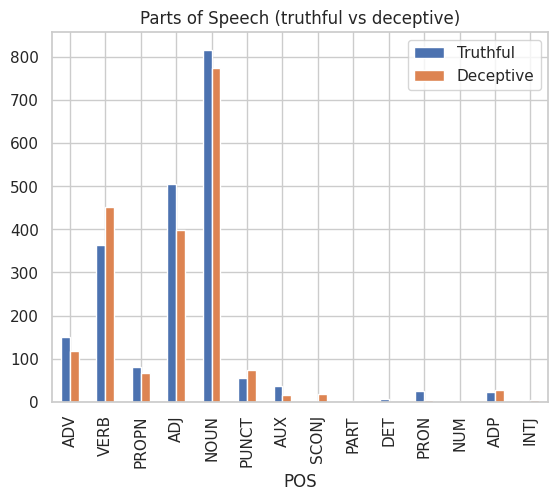

In [64]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine POS counts by review type
def aggregate_pos_counts(df1, review_type):
    filtered_df = df1[df1['review_type'] == review_type]
    # Aggregate POS counts
    pos_counts = sum((Counter(pos) for pos in filtered_df['pos_counts']), Counter())
    return pos_counts

# Get POS counts for truthful and deceptive reviews
truthful_pos_counts = aggregate_pos_counts(df1, 'truthful')
deceptive_pos_counts = aggregate_pos_counts(df1, 'deceptive')

# Convert to DataFrame for visualization
pos_df = pd.DataFrame({
    'POS': list(truthful_pos_counts.keys()),
    'Truthful': list(truthful_pos_counts.values()),
    'Deceptive': [deceptive_pos_counts.get(pos, 0) for pos in truthful_pos_counts.keys()]
})

print(pos_df.head())

pos_df.plot(kind='bar',x='POS', title='Parts of Speech (truthful vs deceptive)')

**Use of Numbers & Punctuation is significantly less in deceptive than truthful **

> Add blockquote

> Add blockquote





**There are more nouns and adjectives in Truthful than Deceptive**

In [65]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine entity counts by review type
def aggregate_entity_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate entity counts
    entity_counts = sum((Counter(entities) for entities in filtered_df['entities']), Counter())
    return entity_counts

# Get entity counts for truthful and deceptive reviews
truthful_entity_counts = aggregate_entity_counts(df, 'truthful')
deceptive_entity_counts = aggregate_entity_counts(df, 'deceptive')

# Convert to DataFrame for visualization
entity_df = pd.DataFrame({
    'Entity': list(truthful_entity_counts.keys()),
    'Truthful': list(truthful_entity_counts.values()),
    'Deceptive': [deceptive_entity_counts.get(entity, 0) for entity in truthful_entity_counts.keys()]
})

# Print the entity counts DataFrame
print(entity_df.head())

# Plot the entity counts
#entity_df.plot(kind='bar', x='Entity', title='Entity Counts (truthful vs deceptive)')
#plt.show()


                      Entity  Truthful  Deceptive
0  (3 minutes morning, TIME)         1          0
1               (1927, DATE)         1          0
2              (2, CARDINAL)       117         13
3            (two, CARDINAL)       138         74
4        (7 years ago, DATE)         1          0


In [66]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine entity counts by review type
def aggregate_entity_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate entity counts
    entity_counts = sum((Counter(entities) for entities in filtered_df['entities']), Counter())
    return entity_counts

# Get entity counts for truthful and deceptive reviews
truthful_entity_counts = aggregate_entity_counts(df1, 'truthful')
deceptive_entity_counts = aggregate_entity_counts(df1, 'deceptive')

# Convert to DataFrame for visualization
entity_df = pd.DataFrame({
    'Entity': list(truthful_entity_counts.keys()),
    'Truthful': list(truthful_entity_counts.values()),
    'Deceptive': [deceptive_entity_counts.get(entity, 0) for entity in truthful_entity_counts.keys()]
})

# Print the entity counts DataFrame
print(entity_df.head())

# Plot the entity counts
#entity_df.plot(kind='bar', x='Entity', title='Entity Counts (truthful vs deceptive)')
#plt.show()


                           Entity  Truthful  Deceptive
0                   (night, TIME)         1          0
1             (monaco hotel, FAC)         1          0
2                 (evening, TIME)         2          0
3                  (chicago, GPE)        30          0
4  (talbott hotel hidden, PERSON)         1          0


      Pronoun  Truthful  Deceptive
0          us       303        218
1   something        49         51
2  everything       109        110
3    everyone        44         34
4     nothing        70         75


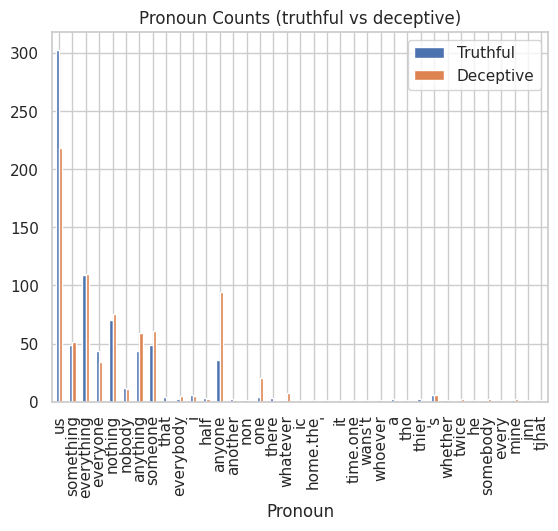

In [67]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine pronoun counts by review type
def aggregate_pronoun_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate pronoun counts
    pronoun_counts = sum((Counter(pronouns) for pronouns in filtered_df['pronouns']), Counter())
    return pronoun_counts

# Get pronoun counts for truthful and deceptive reviews
truthful_pronoun_counts = aggregate_pronoun_counts(df, 'truthful')
deceptive_pronoun_counts = aggregate_pronoun_counts(df, 'deceptive')

# Convert to DataFrame for visualization
pronoun_df = pd.DataFrame({
    'Pronoun': list(truthful_pronoun_counts.keys()),
    'Truthful': list(truthful_pronoun_counts.values()),
    'Deceptive': [deceptive_pronoun_counts.get(pronoun, 0) for pronoun in truthful_pronoun_counts.keys()]
})

# Print the pronoun counts DataFrame
print(pronoun_df.head())

# Plot the pronoun counts
pronoun_df.plot(kind='bar', x='Pronoun', title='Pronoun Counts (truthful vs deceptive)')
plt.show()

      Pronoun  Truthful  Deceptive
0      anyone        15          1
1  everything         9          0


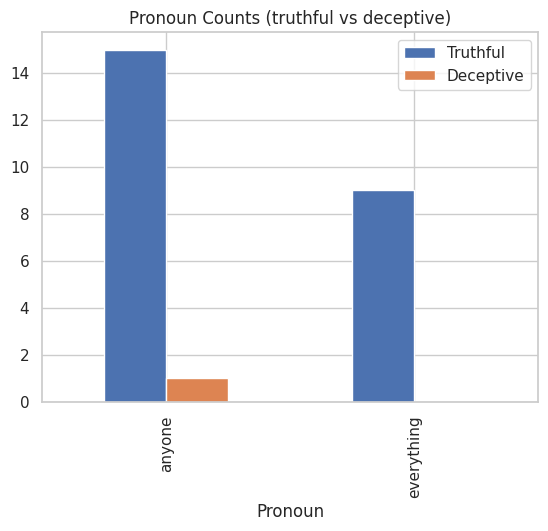

In [68]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine pronoun counts by review type
def aggregate_pronoun_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate pronoun counts
    pronoun_counts = sum((Counter(pronouns) for pronouns in filtered_df['pronouns']), Counter())
    return pronoun_counts

# Get pronoun counts for truthful and deceptive reviews
truthful_pronoun_counts = aggregate_pronoun_counts(df1, 'truthful')
deceptive_pronoun_counts = aggregate_pronoun_counts(df1, 'deceptive')

# Convert to DataFrame for visualization
pronoun_df = pd.DataFrame({
    'Pronoun': list(truthful_pronoun_counts.keys()),
    'Truthful': list(truthful_pronoun_counts.values()),
    'Deceptive': [deceptive_pronoun_counts.get(pronoun, 0) for pronoun in truthful_pronoun_counts.keys()]
})

# Print the pronoun counts DataFrame
print(pronoun_df.head())

# Plot the pronoun counts
pronoun_df.plot(kind='bar', x='Pronoun', title='Pronoun Counts (truthful vs deceptive)')
plt.show()

**us approx 33% more in truthful, anyone approx 50% more in deceptive**

In [69]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine action verb counts by review type
def aggregate_action_verb_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate action verb counts
    action_verb_counts = sum((Counter(action_verbs) for action_verbs in filtered_df['action_verbs']), Counter())
    return action_verb_counts

# Get action verb counts for truthful and deceptive reviews
truthful_action_verb_counts = aggregate_action_verb_counts(df, 'truthful')
deceptive_action_verb_counts = aggregate_action_verb_counts(df, 'deceptive')

# Convert to DataFrame for visualization
action_verb_df = pd.DataFrame({
    'Action Verb': list(truthful_action_verb_counts.keys()),
    'Truthful': list(truthful_action_verb_counts.values()),
    'Deceptive': [deceptive_action_verb_counts.get(verb, 0) for verb in truthful_action_verb_counts.keys()]
})

# Print the action verb counts DataFrame
print(action_verb_df.head())

# Plot the action verb counts
#action_verb_df.plot(kind='bar', x='Action Verb', title='Action Verb Counts (truthful vs deceptive)')
#plt.show()

  Action Verb  Truthful  Deceptive
0        stay       474        540
1        feel        54         65
2       comfy        16          7
3      choose        24         17
4      seeing         8         15


**staying used approx 50% less in truthful than deceptive**

In [70]:
import pandas as pd
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Combine action verb counts by review type
def aggregate_action_verb_counts(df, review_type):
    filtered_df = df[df['review_type'] == review_type]
    # Aggregate action verb counts
    action_verb_counts = sum((Counter(action_verbs) for action_verbs in filtered_df['action_verbs']), Counter())
    return action_verb_counts

# Get action verb counts for truthful and deceptive reviews
truthful_action_verb_counts = aggregate_action_verb_counts(df1, 'truthful')
deceptive_action_verb_counts = aggregate_action_verb_counts(df1, 'deceptive')

# Convert to DataFrame for visualization
action_verb_df = pd.DataFrame({
    'Action Verb': list(truthful_action_verb_counts.keys()),
    'Truthful': list(truthful_action_verb_counts.values()),
    'Deceptive': [deceptive_action_verb_counts.get(verb, 0) for verb in truthful_action_verb_counts.keys()]
})

# Print the action verb counts DataFrame
print(action_verb_df.head())

# Plot the action verb counts
#action_verb_df.plot(kind='bar', x='Action Verb', title='Action Verb Counts (truthful vs deceptive)')
#plt.show()

  Action Verb  Truthful  Deceptive
0      stayed         5          0
1   welcoming        18          0
2        went         4          0
3      ensure         4          0
4      choose         1          3


In [71]:
df.info()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hotel_name              1600 non-null   object 
 1   review_text             1600 non-null   object 
 2   review_type             1600 non-null   object 
 3   polarity                1600 non-null   object 
 4   word_count              1600 non-null   int64  
 5   sentence_count          1600 non-null   int64  
 6   avgwordsper_sentence    1600 non-null   float64
 7   cleaned_text            1600 non-null   object 
 8   sentiment_polarity      1600 non-null   float64
 9   sentiment_subjectivity  1600 non-null   float64
 10  emotion                 1600 non-null   object 
 11  pos_counts              1600 non-null   object 
 12  entities                1600 non-null   object 
 13  pronouns                1600 non-null   object 
 14  action_verbs            1600 non-null   

In [72]:
df.to_csv('Hotel_Reviews_EDA.csv')
df1.to_csv('Hotel_Reviews_EDA_Test.csv')

In [73]:
1

1

In [74]:
!pip install empath

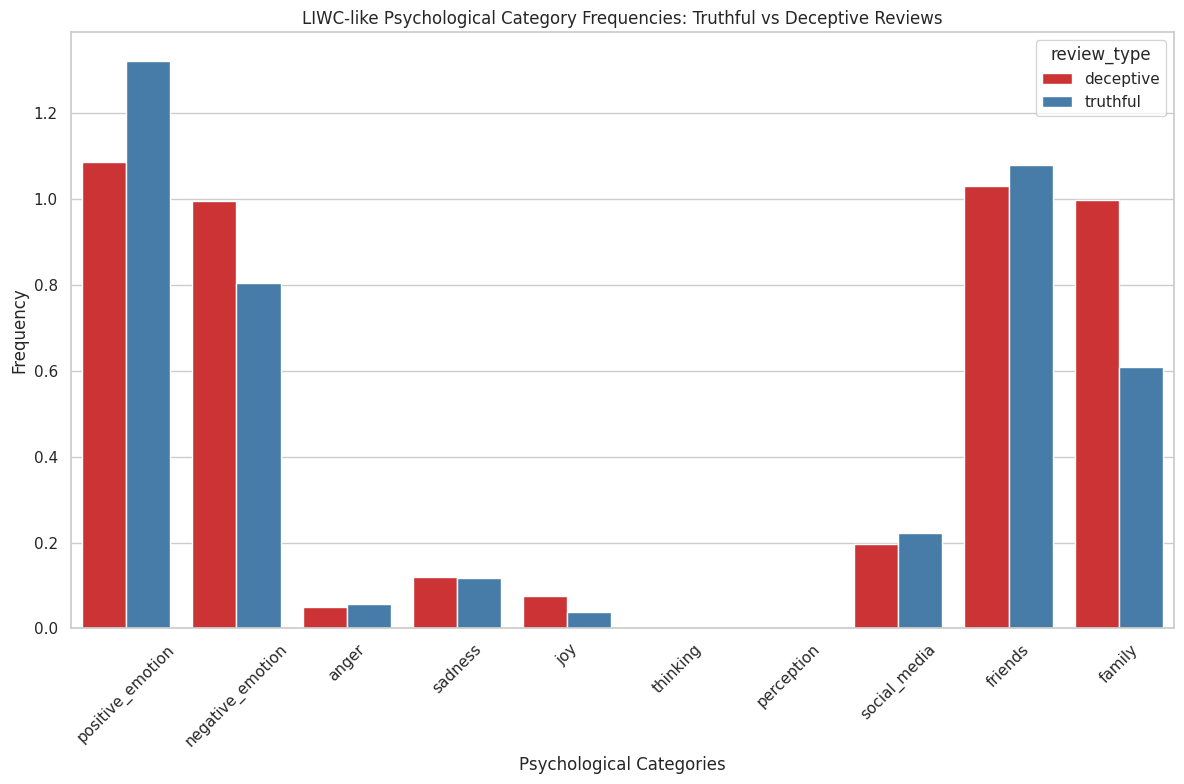

In [75]:
from empath import Empath

lexicon = Empath()
categories = ['positive_emotion', 'negative_emotion', 'anger', 'sadness', 'joy', 'thinking', 'perception', 'social_media', 'friends', 'family']

def analyze_with_empath(text):
    analysis = lexicon.analyze(text, categories=categories)
    return analysis

# Apply Empath analysis on the 'cleaned_text' column
df['empath_analysis'] = df['cleaned_text'].apply(analyze_with_empath)

# Convert the empath_analysis column into separate columns for each category
for category in categories:
    df[category] = df['empath_analysis'].apply(lambda x: x.get(category, 0))

# Aggregate the results by review type (truthful vs deceptive)
empath_summary = df.groupby('review_type')[categories].mean().reset_index()

# Melt the data for easy plotting with Seaborn
empath_melted = empath_summary.melt(id_vars='review_type', var_name='Category', value_name='Frequency')

# Plot the frequency of psychological categories
plt.figure(figsize=(12, 8))
sns.barplot(data=empath_melted, x='Category', y='Frequency', hue='review_type', palette='Set1')

# Add title and labels
plt.title('LIWC-like Psychological Category Frequencies: Truthful vs Deceptive Reviews')
plt.xlabel('Psychological Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x labels for better readability

# Show the plot
plt.tight_layout()
plt.show()


 Deceptive reviews may show different psychological markers compared to truthful ones.
Word Categories: Check for the use of tentative language (e.g., "perhaps," "maybe") or certainty (e.g., "definitely," "certainly"), as deceptive reviews may use hedging more often.

In [76]:
df.groupby('polarity')['sentence_count'].var()

,sentence_count
polarity,
negative,35.949360
positive,20.327103


In [77]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt

# Load the stop words
nltk.download('stopwords')
stop_words = stopwords.words('english')

# Initialize CountVectorizer (Bag-of-Words model)
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)

# Fit and transform the cleaned reviews to create the document-term matrix
X = vectorizer.fit_transform(df['cleaned_text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
# Set the number of topics
n_topics = 10

# Initialize the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=73)

# Fit the LDA model to the document-term matrix
lda_model.fit(X)

LatentDirichletAllocation(random_state=73)

In [79]:
# Function to display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Display the topics with top 10 words
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)

Topic #0:
hotel chicago room rooms sofitel service stay stayed staff tower
Topic #1:
hotel room staff one chicago rooms night would great get
Topic #2:
room hotel chicago stay smoking day non staff could desk
Topic #3:
room hotel service stay chicago desk us would one could
Topic #4:
hotel room stay chicago service rooms would great stayed staff
Topic #5:
hotel chicago great room stay staff stayed time really would
Topic #6:
hotel chicago room stay great would location rooms staff service
Topic #7:
room hotel would night stay get could one us bed
Topic #8:
chicago hotel would great location staff stay room business conrad
Topic #9:
hotel staff chicago room great stay would us location omni


In [80]:
!pip install pyLDAvis

In [81]:
import pyLDAvis
import pyLDAvis.lda_model
import os

# Prepare to visualize the LDA model
lda_visualization = pyLDAvis.lda_model.prepare(lda_model, X, vectorizer)

# Enable notebook display
pyLDAvis.enable_notebook()

# Display the visualization in a Jupyter notebook
pyLDAvis.display(lda_visualization)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hotel_name              1600 non-null   object 
 1   review_text             1600 non-null   object 
 2   review_type             1600 non-null   object 
 3   polarity                1600 non-null   object 
 4   word_count              1600 non-null   int64  
 5   sentence_count          1600 non-null   int64  
 6   avgwordsper_sentence    1600 non-null   float64
 7   cleaned_text            1600 non-null   object 
 8   sentiment_polarity      1600 non-null   float64
 9   sentiment_subjectivity  1600 non-null   float64
 10  emotion                 1600 non-null   object 
 11  pos_counts              1600 non-null   object 
 12  entities                1600 non-null   object 
 13  pronouns                1600 non-null   object 
 14  action_verbs            1600 non-null   

In [83]:
df.columns

Index(['hotel_name', 'review_text', 'review_type', 'polarity', 'word_count',
       'sentence_count', 'avgwordsper_sentence', 'cleaned_text',
       'sentiment_polarity', 'sentiment_subjectivity', 'emotion', 'pos_counts',
       'entities', 'pronouns', 'action_verbs', 'empath_analysis',
       'positive_emotion', 'negative_emotion', 'anger', 'sadness', 'joy',
       'thinking', 'perception', 'social_media', 'friends', 'family'],
      dtype='object')

In [84]:
df.to_csv('Hotel_Reviews_EDA_ALL.csv', index=False)

In [85]:
df.describe()

,word_count,sentence_count,avgwordsper_sentence,sentiment_polarity,sentiment_subjectivity,positive_emotion,negative_emotion,anger,sadness,joy,thinking,perception,social_media,friends,family
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.0,1600.0,1600.00000,1600.000000,1600.000000
mean,805.056250,9.536875,89.303194,0.209978,0.557900,1.203125,0.899375,0.053125,0.118125,0.056875,0.0,0.0,0.21000,1.053750,0.802500
std,467.349336,5.473218,39.378001,0.217106,0.116086,1.357117,1.208889,0.260471,0.395941,0.273746,0.0,0.0,0.55099,1.223436,1.199747
min,149.000000,1.000000,29.083333,-0.625000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
25%,485.750000,6.000000,68.877193,0.051101,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.000000,0.000000
50%,698.000000,8.000000,83.607692,0.222784,0.555662,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,1.000000,0.000000
75%,986.250000,12.000000,101.517857,0.361750,0.632024,2.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,2.000000,1.000000
max,4158.000000,58.000000,541.000000,0.826667,0.975000,8.000000,9.000000,3.000000,4.000000,4.000000,0.0,0.0,7.00000,8.000000,13.000000
